In [4]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
modellingephemeral = '/rds/general/ephemeral/user/mo2016/ephemeral/Documents/modelling'
sys.path.append(modellingpath + '/lib')
#############
import numpy as np
import pickle as pkl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
#fit 
pfitDict = {'Vc': 99.99999998437673,
 'Vd': 8.845204237579598,
 'Ve': 99.99999902098732,
 'Vf': 8.394996554940189,
 'Kvd': 0.9400832873750722,
 'Kda': 4.142114110177617,
 'Kce': 4.342277899710668,
 'Kfe': 0.4319218458202641}
pfit =np.array(list(pfitDict.values()),dtype=np.float64)

#turing dist
circuit_n=14;variant='2nd';n_species=6;nsamples=1000000
folder = 'circuit14variant2ndBalancedTuring'
with open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/turing_dataframes/turing_df_circuit%s_variant%s_%sparametersets_balanced.pkl'%(circuit_n,variant,nsamples), "rb" ) as f:
   turingDf = pkl.load(f)


circuit_n='circuit14'
variant='2nd'
n_species=6
n_param_sets = 1000000
balance = 'balanced'
generalDf= pkl.load( open(modellingpath + "/3954/paper/input/balanced_parameterfiles/df_%s_variant%s_%rparametersets_%s.pkl"%(circuit_n,variant,n_param_sets, balance), "rb"))
generalDf = generalDf[pfitDict.keys()].iloc[:176]
pfitDict.keys()
turingDf = turingDf[pfitDict.keys()]
concatDf = pd.concat([turingDf,generalDf])


#add fit to Turing df
concatDf.loc['fit'] = pfit
turingDf.loc['fit'] = pfit


turingNp = turingDf.to_numpy(dtype=np.float64)
generalNp = generalDf.to_numpy(dtype=np.float64)
#add fit to Turing df

turingNp

print([i for i in concatDf.index[:176]])
print([i for i in concatDf.index[176:-1]])
print([i for i in concatDf.index[-1]])



[3966, 4085, 10335, 15760, 20766, 47016, 54550, 58691, 72806, 77300, 85194, 87739, 88692, 92965, 94451, 101758, 104547, 104868, 112848, 131634, 134332, 142270, 146017, 161487, 162635, 163476, 168507, 169464, 185743, 195238, 199502, 200278, 207393, 218663, 223304, 234375, 245373, 247757, 275449, 283100, 286493, 286516, 289057, 299314, 302939, 304975, 305425, 306503, 311062, 316386, 320542, 321709, 322575, 324282, 333613, 339249, 352867, 356503, 356642, 358504, 361095, 363240, 374225, 389088, 390373, 396183, 396996, 403995, 413626, 416012, 424914, 428793, 441106, 442155, 443951, 467654, 474471, 476187, 479187, 486244, 489120, 495071, 496551, 521542, 527421, 530904, 532738, 539583, 541335, 541895, 549949, 558159, 564127, 568310, 568310, 568554, 575668, 576581, 585364, 587473, 588409, 588826, 589399, 591819, 597258, 597985, 599872, 602990, 607822, 613218, 614263, 619034, 621673, 632486, 635673, 637909, 643749, 646250, 651918, 654868, 655788, 657541, 661376, 669293, 670343, 671903, 672691, 

## Mahanohabis distance 

[389.84872529 281.33679725 106.70254044  91.26050492  17.46997511
   1.18936236 123.89592471   1.72054453]
(8, 8)


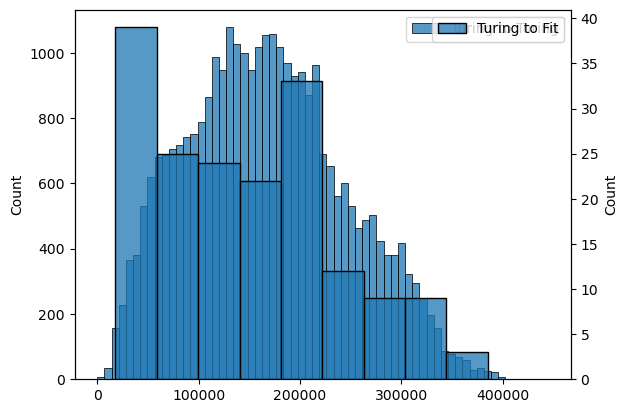

In [5]:
#calculate mahanohabis distance for each parameter set to fit
from scipy.spatial.distance import mahalanobis
print(turingNp[0])
#calculate covariance matrix
# cov = turingDf[pfitDict.keys()].cov()
cov = np.cov(turingNp.T)
print(cov.shape)
mahalanobisTuring = []
for n1 in range(len(turingDf)):
    for n2 in range(len(turingDf)):
        if n1!=n2:
            mahalanobisTuring.append(mahalanobis(turingNp[n1], turingNp[n2], VI=cov))
mahalanobisFit = []
for n in range(len(turingDf)):
    mahalanobisFit.append(mahalanobis(turingNp[n], pfit, VI=cov))


fig, ax = plt.subplots()
sns.histplot(mahalanobisTuring, label='Turing to Turing', ax=ax)
ax.legend()

ax2 = ax.twinx()
sns.histplot(mahalanobisFit, label='Turing to Fit',ax=ax2)
ax2.legend()
plt.show()
#     mahalanobisTuring.append()
# print(mahalanobis(turingNp[0], pfit, VI=cov))
# print(mahalanobis(turingNp[1], pfit, VI=cov))
# print(mahalanobis(pfit, pfit, VI=cov))
# print(mahalanobis(turingNp[1], turingNp[2], VI=cov))


## tsne 

In [38]:


#plot tsne of turing and fit
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(concatDf)
# tsne_results = tsne.fit_transform(turingDf)

# #2d plot


/Users/mo2016/opt/anaconda3/envs/condaenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mo2016/opt/anaconda3/envs/condaenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 353 samples in 0.000s...
[t-SNE] Computed neighbors for 353 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 353 / 353
[t-SNE] Mean sigma: 161.900386
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.670486
[t-SNE] KL divergence after 1000 iterations: 0.659860


IndexError: index 2 is out of bounds for axis 1 with size 2

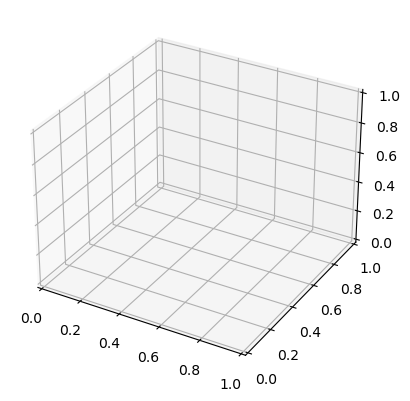

In [32]:

#3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_results[:176,0],tsne_results[:176,1],tsne_results[:176,2], alpha=0.5, color = 'lightsteelblue')
ax.scatter(tsne_results[176:-1,0],tsne_results[176:-1,1],tsne_results[176:-1,2], alpha=0.5, color='mediumseagreen')
ax.scatter(tsne_results[-1,0],tsne_results[-1,1],tsne_results[-1,2],color='red')
plt.show()

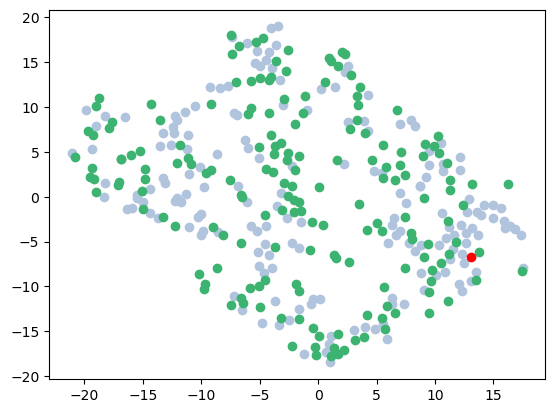

In [39]:
fig, ax = plt.subplots()
ax.scatter(tsne_results[:176,0],tsne_results[:176,1], alpha=1, color = 'lightsteelblue')
ax.scatter(tsne_results[176:-1,0],tsne_results[176:-1,1], alpha=1, color='mediumseagreen')
ax.scatter(tsne_results[-1,0],tsne_results[-1,1],color='red')
plt.show()